In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from config import COLORS

import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")
from plotutils import *
plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

In [19]:
FILE = 'SummaryTable_July2024.csv'
df = pd.read_csv(FILE)

df['case_color'] = [COLORS[case] for case in df['case']]
case_dict = {case:COLORS[case] for case in df['case']}


In [20]:
df

,case,Dataset,Dataset size,Representation,Split,Epochs,Training size,Accuracy,Unnamed: 8,case_color
0,Adhesive Energy,Adhesive Energy,16000,"Chain Sequence e.g., ABABBAAB",median,4,5000,92.6,NaN,maroon
1,Properties of Monomers,Density,410,SMILES,median,20,300,84.6,NaN,sienna
2,Melting Point,Melting Point,274983,SMILES,median,25,1000,69.3,NaN,darkgoldenrod
3,Viscosity,Viscosity,100,SMILES,median,30,80,80.0,NaN,slategray
4,Mg Alloys,Grain Size,81,elemental composition Process route 9 proc. pa...,median,50,25,84.0,NaN,skyblue
5,LLPS of Proteins,LLPS,1561,Protein Seqeunce,median,25,168,85.0,NaN,crimson
6,Cycloaddition,Cycloaddition,966,1 x SMILES,median,25,250,94.0,NaN,forestgreen
7,Catalyzed Cleavage Reaction,Ni Catalysis,1423,1 x SMILES,median,20,1000,90.0,NaN,springgreen
8,Catalytic Isomerization,Catalytic isomerisation yield,16,SMILES,median,50,13,55.0,NaN,royalblue
9,Polymerization Kinetics,Polymerization Kinetics,22,SMILES,median,50,15,76.0,NaN,salmon


/tmp/ipykernel_2689959/678351139.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 8000)


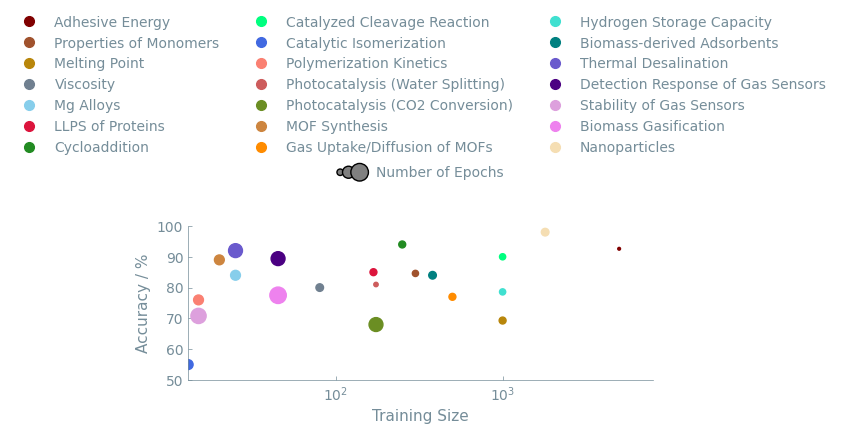

In [21]:
class AnyObject:
    pass

class AnyObjectHandler:
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        
        # Radius of the circles
        radius = min(width, height) / 3
        
        # Create the circles
        circles = []
        colors = ['red', 'green', 'blue']
        positions = [(0.1, 0.5), (0.4, 0.5), (0.8, 0.5)]
        for color, (x, y), size in zip(colors, positions, [0, 2, 4]):
            circle = mpatches.Circle([x0 + width * x, y0 + height * y], radius + size,
                                      facecolor='gray', edgecolor='black', lw=1,
                                      transform=handlebox.get_transform())
            circles.append(circle)
        
        # Add circles to the handlebox
        for circle in circles:
            handlebox.add_artist(circle)
        
        return circles


# Creating legend with custom handler
# The custom handler will automatically add the circles to the legend

fig, ax = plt.subplots(figsize = (6,2))

# Create the values for the legend
for case,color in case_dict.items():
    line = mlines.Line2D([], [], color=color, label=case, marker = 'o', linestyle='', markersize=7)
    ax.add_line(line)

scatterplot = ax.scatter(df['Training size'], df['Accuracy'], 
            s = df['Epochs'], 
            c = df['case_color']
            )

ax.set_xscale('log')
ax.set_xlim(0, 8000)
ax.set_xlabel('Training Size')

ax.set_ylim(50, 100)
ax.set_ylabel('Accuracy / %')

X_POS_LEGEND = 0.5
Y_POS_LEGEND = 2.45

# three circles in legend indicating 'Number of Epochs
l = ax.legend([AnyObject()], ['Number of Epochs'], handler_map={AnyObject: AnyObjectHandler()}, bbox_to_anchor=(X_POS_LEGEND, Y_POS_LEGEND * 0.6), loc = 9)
ax.add_artist(l,)

l2 = ax.legend(
    bbox_to_anchor=(X_POS_LEGEND, Y_POS_LEGEND),
      ncol = 3, 
      loc = 9
      )
fig.savefig('trainingSizePlot.pdf', bbox_inches = 'tight')
